### data set
https://www.kaggle.com/retailrocket/ecommerce-dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### load data

In [4]:
events = pd.DataFrame.from_csv('./data/test_events.csv')

In [5]:
events.reset_index(inplace=True)

In [6]:
events.head()

,index,timestamp,visitorid,event,itemid,transactionid
0,2204881,1439871817919,384670,view,419836,-1
1,2204882,1439871821714,1166298,view,375066,-1
2,2204883,1439871824135,531293,view,48030,-1
3,2204884,1439871826488,86098,view,231243,-1
4,2204885,1439871832105,290950,view,436832,-1


### events explore

In [7]:
events.shape

(551220, 6)

In [8]:
#количество уникальных пользователей
events.visitorid.unique().size

308548

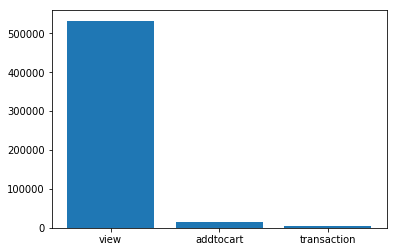

In [9]:
#количество типов событий
plt.bar(np.arange(events.event.value_counts().shape[0]), events.event.value_counts().values)
plt.xticks(np.arange(events.event.value_counts().shape[0]), events.event.value_counts().index)
plt.show()

In [10]:
#количество типов событий
events.event.value_counts()

view           532280
addtocart       14347
transaction      4593
Name: event, dtype: int64

### Анализ интервалов между событиями пользователя

In [11]:
##отсортируем по timestamp и visitorid

In [12]:
e = events.sort_values(['visitorid', 'timestamp'], ascending=[True, True])

In [13]:
e = e.reset_index(drop=True)

In [14]:
## вычислим интервал между событиями в минутах

In [15]:
e['delta'] = 0

In [16]:
%%time
a = np.zeros(e.shape[0])
user = 0
delta =  np.nan
for index, row in e.iterrows():
    if user != row['visitorid']:
        #delta = row['timestamp']
        a[index] = np.nan
    else:
        a[index] = (row['timestamp'] - delta)/(1000*60)
    delta = row['timestamp'] 
    user = row['visitorid']
    #print(index)

Wall time: 57.6 s


In [17]:
e.delta = a

In [18]:
e.head()

,index,timestamp,visitorid,event,itemid,transactionid,delta
0,2655436,1442004589439,0,view,285930,-1,NaN
1,2655495,1442004759591,0,view,357564,-1,2.835867
2,2655555,1442004917175,0,view,67045,-1,2.626400
3,2731107,1442352267167,4,view,177677,-1,NaN
4,2422269,1440914628202,6,addtocart,65273,-1,NaN


In [19]:
q = 31.55302083333333


### разделим на сессии

In [20]:
e['delta1'] = 0
e['ssid'] = 0

In [21]:
e = e.reset_index(drop=True)

In [22]:
%%time
s = np.zeros(e.shape[0])
ssid = e.ssid.iloc[0]
d1 = np.zeros(e.shape[0])
for index, row in e.iterrows():
    if np.isnan(row['delta']):
        ssid +=1
        d1[index] = np.nan
    elif row['delta'] > q:
        d1[index] = np.nan
        ssid +=1
    else:
        d1[index] = row['delta']
    s[index] = ssid

Wall time: 49.4 s


In [23]:
e['ssid'] = s
e['delta1'] = d1

In [24]:
e.head(10)

,index,timestamp,visitorid,event,itemid,transactionid,delta,delta1,ssid
0,2655436,1442004589439,0,view,285930,-1,NaN,NaN,1.0
1,2655495,1442004759591,0,view,357564,-1,2.835867,2.835867,1.0
2,2655555,1442004917175,0,view,67045,-1,2.626400,2.626400,1.0
3,2731107,1442352267167,4,view,177677,-1,NaN,NaN,2.0
4,2422269,1440914628202,6,addtocart,65273,-1,NaN,NaN,3.0
5,2422579,1440916778318,6,view,253615,-1,35.835267,NaN,4.0
6,2422581,1440916823805,6,view,344723,-1,0.758117,0.758117,4.0
7,2422674,1440917649385,6,view,344723,-1,13.759667,13.759667,4.0
8,2422699,1440917793838,6,view,344723,-1,2.407550,2.407550,4.0
9,2437154,1440991285697,6,view,344723,-1,1224.864317,NaN,5.0


In [25]:
#количество уникальных  сессий 
e.ssid.unique().size

364780

In [26]:
#количество уникальных пользователей
e.visitorid.unique().size

308548

In [27]:
#средне и медиана delta
print(e.delta1.mean(), e.delta1.median())

3.43083481031 1.3134916666666667


In [28]:
##причешем датачет

In [29]:
e['event_type'] = e.event.copy()

In [30]:
e.event_type = e.event_type.replace({'view': 0, 'addtocart': 1, 'transaction': 2})

In [31]:
e['event_type'] = e['event_type'].astype(int)

In [32]:
e['ssid'] = e['ssid'].astype(int)

In [33]:
e.head()

,index,timestamp,visitorid,event,itemid,transactionid,delta,delta1,ssid,event_type
0,2655436,1442004589439,0,view,285930,-1,NaN,NaN,1,0
1,2655495,1442004759591,0,view,357564,-1,2.835867,2.835867,1,0
2,2655555,1442004917175,0,view,67045,-1,2.626400,2.626400,1,0
3,2731107,1442352267167,4,view,177677,-1,NaN,NaN,2,0
4,2422269,1440914628202,6,addtocart,65273,-1,NaN,NaN,3,1


In [34]:
##причешем датачет

In [35]:
events = e.copy()

In [36]:
events['event_type'] = events.event.copy()

In [37]:
events.event_type =  events.event_type.replace({'view': 0, 'addtocart': 1, 'transaction': 2})

In [38]:
events['event_type'] = events['event_type'].astype(int)

In [39]:
events['ssid'] = events['ssid'].astype(int)


In [40]:
e.head()

,index,timestamp,visitorid,event,itemid,transactionid,delta,delta1,ssid,event_type
0,2655436,1442004589439,0,view,285930,-1,NaN,NaN,1,0
1,2655495,1442004759591,0,view,357564,-1,2.835867,2.835867,1,0
2,2655555,1442004917175,0,view,67045,-1,2.626400,2.626400,1,0
3,2731107,1442352267167,4,view,177677,-1,NaN,NaN,2,0
4,2422269,1440914628202,6,addtocart,65273,-1,NaN,NaN,3,1


In [41]:
events_trans = events.sort_values(['ssid', 'timestamp'], ascending=[True, True])

In [42]:
ssids = events_trans.ssid.unique()

In [43]:
%%time
drop_list = []
transaction_list = []
for i in ssids:
    event = events_trans.loc[events_trans.ssid == i]
    for index, row in event.iterrows():
        if row['event_type'] == 2:
            drop_list.extend(list(event.loc[event.index > index].index))
            transaction_list.append(i)
            break

Wall time: 8min 9s


In [44]:
len(transaction_list) 

2952

In [45]:
len(drop_list)

9142

In [46]:
e_ = events.loc[events.index.isin(drop_list)]

In [47]:
e_.shape

(9142, 10)

In [48]:
events.shape[0] - e_.shape[0]

542078

In [49]:
events = events.drop(e_.index,axis=0)

In [50]:
events.shape[0]

542078

In [51]:
events.reset_index(inplace=True)

In [52]:
events = events.drop('level_0',axis=1)

In [53]:
events_trans = events.loc[events.ssid.isin(transaction_list)]

In [54]:
events_trans.shape

(15193, 10)

In [55]:
events['session_transation_type'] = 0

In [56]:
events['session_transation_type'].loc[events.ssid.isin(transaction_list)] = 1

In [57]:
events['session_transation_type'].value_counts()

0    526885
1     15193
Name: session_transation_type, dtype: int64

In [58]:
events.shape

(542078, 11)

In [59]:
events.head()

,index,timestamp,visitorid,event,itemid,transactionid,delta,delta1,ssid,event_type,session_transation_type
0,2655436,1442004589439,0,view,285930,-1,NaN,NaN,1,0,0
1,2655495,1442004759591,0,view,357564,-1,2.835867,2.835867,1,0,0
2,2655555,1442004917175,0,view,67045,-1,2.626400,2.626400,1,0,0
3,2731107,1442352267167,4,view,177677,-1,NaN,NaN,2,0,0
4,2422269,1440914628202,6,addtocart,65273,-1,NaN,NaN,3,1,0


In [60]:
events = events.sort_values(['ssid', 'timestamp'], ascending=[True, True])

In [61]:
#save data
events.to_csv('./data/train_events_4.csv')

In [62]:
events = pd.DataFrame.from_csv('./data/train_events_4.csv')

In [63]:
%%time
sessions_ =  events[['ssid',
                     'event_type',
                     'itemid',
                     ]].groupby('ssid')

Wall time: 6 ms


In [64]:
seq = pd.DataFrame()

In [65]:
%%time
seq['actions'] = sessions_['event_type'].apply(list)
seq['items'] = sessions_['itemid'].apply(list)

Wall time: 45.6 s


In [66]:
seq.reset_index(inplace=True)

In [67]:
seq.head()

,ssid,actions,items
0,1,"[0, 0, 0]","[285930, 357564, 67045]"
1,2,[0],[177677]
2,3,[1],[65273]
3,4,"[0, 0, 0, 0]","[253615, 344723, 344723, 344723]"
4,5,[0],[344723]


In [68]:
def last_i(list):
    return list[-1]

def train_seq(list):
    if len(list) > 60:
        return list[-60:]
    return list[:-1]

In [69]:
seq.shape

(364780, 3)

In [70]:
%%time
seq['action_last'] = seq.actions.apply(last_i)
seq['items__last'] = seq['items'].apply(last_i)
seq['action_train'] = seq.actions.apply(train_seq)
seq['items__train'] = seq['items'].apply(train_seq)

Wall time: 1.07 s


In [71]:
seq['len'] = seq.actions.apply(len)

In [72]:
seq.shape

(364780, 8)

In [73]:
seq_ = seq.loc[seq.len > 1]

In [74]:
seq_.shape

(76224, 8)

In [75]:
seq_.head()

,ssid,actions,items,action_last,items__last,action_train,items__train,len
0,1,"[0, 0, 0]","[285930, 357564, 67045]",0,67045,"[0, 0]","[285930, 357564]",3
3,4,"[0, 0, 0, 0]","[253615, 344723, 344723, 344723]",0,344723,"[0, 0, 0]","[253615, 344723, 344723]",4
16,17,"[0, 0, 0, 0, 0, 0]","[358388, 198762, 429304, 198762, 49967, 279059]",0,279059,"[0, 0, 0, 0, 0]","[358388, 198762, 429304, 198762, 49967]",6
17,18,"[0, 0, 0, 0, 0, 0]","[388096, 283115, 38965, 319680, 283115, 388096]",0,388096,"[0, 0, 0, 0, 0]","[388096, 283115, 38965, 319680, 283115]",6
18,19,"[0, 0]","[319680, 442228]",0,442228,[0],[319680],2


In [76]:
seq_.action_last.value_counts()

0    70301
1     3154
2     2769
Name: action_last, dtype: int64

In [77]:
data = seq_.copy()
target = seq_['action_last'].copy()

In [78]:
data['len'] = data['action_train'].apply(len)

In [79]:
data.len.max()

60

In [80]:
target = target.replace({0:0, 1:0, 2:1})

## load model

In [81]:
import keras
from keras.models import load_model
from keras.preprocessing import sequence

Using TensorFlow backend.


In [82]:
maxlen = 36

In [83]:
X_test_1 = sequence.pad_sequences(data['action_train'], maxlen=maxlen, value=(np.nan))
X_test_2 = sequence.pad_sequences(data['items__train'], maxlen=maxlen, value=(np.nan))

In [84]:
target.value_counts()

0    73455
1     2769
Name: action_last, dtype: int64

In [85]:
model = load_model('my_model_2.h5')

In [86]:
%%time
y_pred = model.predict(x ={'actions': X_test_1, 'items' : X_test_2}, verbose=1,batch_size=128)

76224/76224 [==============================] - 13s    
Wall time: 13.3 s


## Результаты

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [88]:
import seaborn as sn

In [89]:
confusion_matrix(target, y_pred.argmax(axis=-1))

array([[69999,  3456],
       [  329,  2440]], dtype=int64)

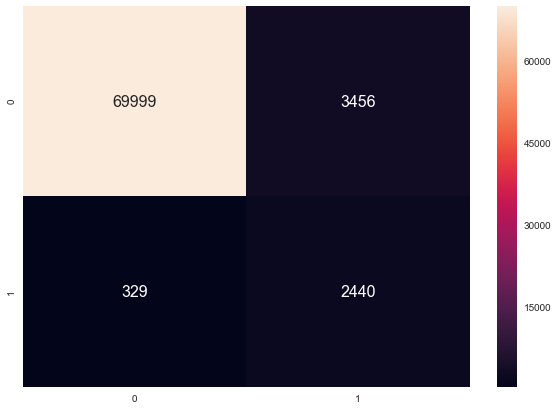

In [90]:
plt.figure(figsize = (10,7))
sn.set(font_scale=1)
sn.heatmap(confusion_matrix(target, y_pred.argmax(axis=-1)), annot=True,annot_kws={"size": 16} ,fmt="d")

In [91]:
accuracy_score(target, y_pred.argmax(axis=-1))

0.95034372376154497

In [92]:
print(classification_report(target ,y_pred.argmax(axis=-1)))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97     73455
          1       0.41      0.88      0.56      2769

avg / total       0.97      0.95      0.96     76224



In [93]:
from sklearn.metrics import precision_recall_curve, roc_curve ,auc, roc_auc_score

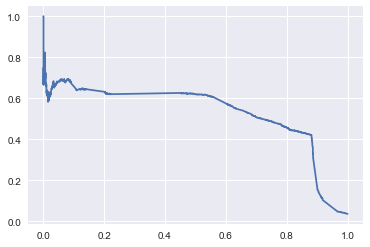

In [94]:
pr, re, thres = precision_recall_curve(target, y_pred[:, 1] )
plt.plot( re, pr )
# построим precision - recall кривую

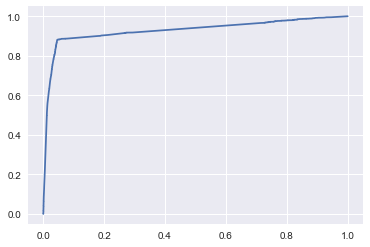

In [95]:
fpr, tpr, thres = roc_curve(target, y_pred[:, 1] )
plt.plot( fpr, tpr )
# построим ROC-кривую (Receiver Operating Characteristic)